In [74]:
import csv
import pandas as pd
from scipy.spatial import distance
import math
import random
from copy import deepcopy
import numpy as np

K means function. It takes as input k (number of clusters we want to find) and l (a list with the coordinates of all the points). <br>
I create two lists such that:<br>
means = [[ID numbers of means], [coordinate of means]] <br>
points = [[coordinate of points], [ID numbers of the belonging mean]]

In [75]:
def kmeans(k, l):
    p1 = [[],[]]      # points[0] = list of the coordinates of the points \\ points[1] = list of the ID number of the belonging cluster
    m1 = [[],[]]       # means[0] = list of ID number of the means \\ means[1] = list of  coordinates of the means
    for i in l:
        p1[0].append(i)
        p1[1].append(-1)
        
    for j in range(k):
        m1[0].append(j)
        m1[1].append(list(random.choice(l)))
        
    count = 0 
    while (count < 500):    #set a max counter for how many times we iterate the process    
        #print(count)
        m0 = deepcopy(m1)
        p0 = deepcopy(p1)

        #assignment
        for i in range(len(p0[0])):
            dist = math.inf
            for k in range(len(m0[0])):
                d = distance.euclidean(p0[0][i], m0[1][k])

                if (d < dist):  #For each point calculate the distance between the point and each mean.
                    dist = d
                    p1[1][i] = deepcopy(m0[0][k])
    
        #update
        for k in range(len(m1[0])):
            index = 0
            c = np.zeros(len(p1[0][0]))
            for i in range(len(p1[1])):
                if (int(p1[1][i]) == int(m1[0][k])):
                    index += 1
                    c += np.array(p0[0][i])
            m1[1][k] = list(c / index)
        count += 1
        
        if (p1[1] == p0[1]):
            break
        
    return (m1, p1)

I make a list with the coordinates of each point (wine) to pass to the function "kmeans".

In [179]:
l = []

with open(r'C:\Users\emanu\Desktop\GitHub\Notes\wine.data') as file:
    reader = csv.reader(file)    
    # Make a list to pass to the kmeans funciton
    for row in reader:
        row.pop(0)
        row = list(map(float, row))  #make all the coordinates floats 
        l.append(row)

Now we run the function kmeans. It returns the lists <br> 
means = [[ID numbers of means], [coordinate of means]] <br>
points = [[coordinate of points], [ID numbers of the belonging mean]]

In [178]:
N = 4
print(kmeans(N, l)[1][1])

[2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 2, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 2, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 2, 1]


Compare the results we obtained with the result of sklearn.cluster.KMeans

In [61]:
from sklearn.cluster import KMeans

In [180]:
clustering = KMeans(n_clusters=N, init="random",  max_iter=500).fit(l)
clustering.predict(l)

array([3, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 1, 1,
       3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 3, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3,
       3, 1])

The cluster are similar, that means that the kmeans function we wrote is working.
Now we want to find the right number of clusters using the elbow method.

In [38]:
ine = []
k = []
for i in range(1,20):
    clustering.predict(l)
    ine.append(clustering.inertia_)
    k.append(i)

In [39]:
from matplotlib import pyplot as plt

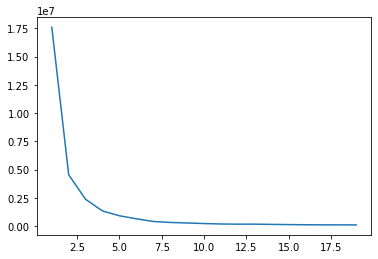

In [55]:
plt.plot(k, ine)

Make a plot for each feature (13) and overwrite the plot of the 3 different custers.

In [165]:
with open(r'C:\Users\emanu\Desktop\GitHub\Notes\wine.data') as file:
    reader = csv.reader(file)
    
    # Make a data frame, we'll need this for the visualization
    col = ["Cultivator", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
    data = pd.DataFrame(reader, columns=col)

Add the belonging cluster to the dataframe

In [105]:
data["Cluster"] = kmeans(N, l)[1][1]

In [106]:
data

,Cultivator,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480,0
4,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740,1
174,3,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750,1
175,3,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835,3
176,3,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840,3


In [142]:
import seaborn as sns

In [175]:
for row in data.iterrows():
    for i in range(1,15):
        for k in range(N):
            mean = 0
            if k ==(row[1][-1]):
                mean += row[1][i]

14.23
13.2
13.16
14.37
13.24
14.2
14.39
14.06
14.83
13.86
14.1
14.12
13.75
14.75
14.38
13.63
14.3
13.83
14.19
13.64
14.06
12.93
13.71
12.85
13.5
13.05
13.39
13.3
13.87
14.02
13.73
13.58
13.68
13.76
13.51
13.48
13.28
13.05
13.07
14.22
13.56
13.41
13.88
13.24
13.05
14.21
14.38
13.9
14.1
13.94
13.05
13.83
13.82
13.77
13.74
13.56
14.22
13.29
13.72
12.37
12.33
12.64
13.67
12.37
12.17
12.37
13.11
12.37
13.34
12.21
12.29
13.86
13.49
12.99
11.96
11.66
13.03
11.84
12.33
12.7
12
12.72
12.08
13.05
11.84
12.67
12.16
11.65
11.64
12.08
12.08
12
12.69
12.29
11.62
12.47
11.81
12.29
12.37
12.29
12.08
12.6
12.34
11.82
12.51
12.42
12.25
12.72
12.22
11.61
11.46
12.52
11.76
11.41
12.08
11.03
11.82
12.42
12.77
12
11.45
11.56
12.42
13.05
11.87
12.07
12.43
11.79
12.37
12.04
12.86
12.88
12.81
12.7
12.51
12.6
12.25
12.53
13.49
12.84
12.93
13.36
13.52
13.62
12.25
13.16
13.88
12.87
13.32
13.08
13.5
12.79
13.11
13.23
12.58
13.17
13.84
12.45
14.34
13.48
12.36
13.69
12.85
12.96
13.78
13.73
13.45
12.82
13.58
13.4
12.

In [177]:
for row in data.iterrows():
    print(row[1])

Cultivator                          1
Alcohol                         14.23
Malic acid                       1.71
Ash                              2.43
Alcalinity of ash                15.6
Magnesium                         127
Total phenols                     2.8
Flavanoids                       3.06
Nonflavanoid phenols              .28
Proanthocyanins                  2.29
Color intensity                  5.64
Hue                              1.04
OD280/OD315 of diluted wines     3.92
Proline                          1065
Name: 0, dtype: object
Cultivator                         1
Alcohol                         13.2
Malic acid                      1.78
Ash                             2.14
Alcalinity of ash               11.2
Magnesium                        100
Total phenols                   2.65
Flavanoids                      2.76
Nonflavanoid phenols             .26
Proanthocyanins                 1.28
Color intensity                 4.38
Hue                             1.05
O

Cultivator                          3
Alcohol                         13.45
Malic acid                        3.7
Ash                               2.6
Alcalinity of ash                  23
Magnesium                         111
Total phenols                     1.7
Flavanoids                        .92
Nonflavanoid phenols              .43
Proanthocyanins                  1.46
Color intensity                 10.68
Hue                               .85
OD280/OD315 of diluted wines     1.56
Proline                           695
Name: 166, dtype: object
Cultivator                          3
Alcohol                         12.82
Malic acid                       3.37
Ash                               2.3
Alcalinity of ash                19.5
Magnesium                          88
Total phenols                    1.48
Flavanoids                        .66
Nonflavanoid phenols               .4
Proanthocyanins                   .97
Color intensity                 10.26
Hue                      